# Daily Challenge - Statistics for Machine Learning

# Applying Inferential Statistics

### Here are the hypotheses to test:
1. Age of people who left the bank and who did not are similar. Alternative: Not similar.
2. Credit score of people who left the bank and who did not are similar. Alternative: Not similar.
3. Balance of people who left the bank and who did not are similar. Alternative: Not similar.
4. Estimated Salary of people who left the bank and who did not are similar. Alternative: Not similar.

#### The most appropriate test to analyse data here is Frequentist test.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats
from scipy.stats import t
from scipy.special import stdtr
from numpy.random import seed
import seaborn as sns

%matplotlib inline
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
matplotlib.rcParams['figure.figsize'] = (8.0, 5.0)

In [3]:
## TODO : load the csv file from this link : https://www.kaggle.com/code/vaibhagarwal/inferential-statistics/input

file_1 = pd.read_csv('/content/Churn_Modelling.csv')

In [4]:
## TODO : make into a dataframe called df

df = file_1

In [5]:
## TODO : output the first 5 lines

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
## TODO : Create two separate DataFrames, `df_0` and `df_1`, to filter customers who have not exited (0) and customers who have exited (1), respectively

df_0 = df[df['Exited'] == 0]
df_1 = df[df['Exited'] == 1]

## Hypothesis 1: Age

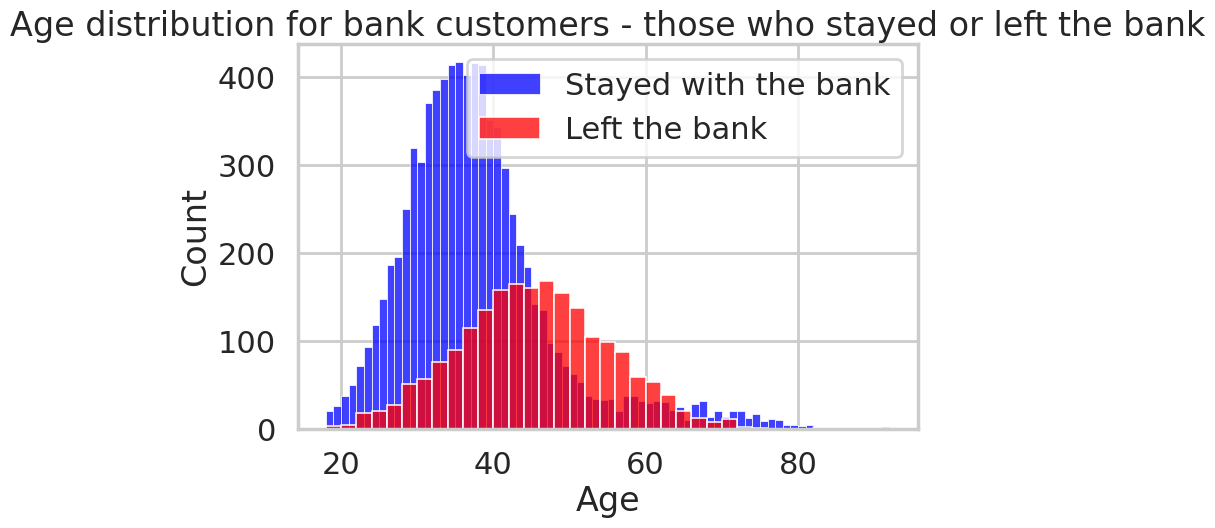

In [7]:
## TODO: Plot the age distribution for customers who stayed with the bank and those who left using seaborn, with different colors for each group and a legend.

sns.histplot(df_0['Age'], color='blue', label='Stayed with the bank')
sns.histplot(df_1['Age'], color='red', label='Left the bank')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution for bank customers - those who stayed or left the bank')
plt.show()


In [8]:
## TODO: Calculate the mean and standard deviation of the age for customers who stayed with the bank.

mean_age_stayed = df_0['Age'].mean()
std_age_stayed = df_0['Age'].std()

In [9]:
## TODO: Calculate the mean and standard deviation of the age for customers who left the bank.

mean_age_left = df_1['Age'].mean()
std_age_left = df_1['Age'].std()

In [10]:
## TODO: Perform a t-test to compare the ages of customers who stayed and left the bank.

t_stat, p_value = scipy.stats.ttest_ind(df_0['Age'], df_1['Age'], equal_var=False)
print("P-value for age:", p_value)

P-value for age: 4.7127272656641046e-179


### Using Bootstrapping

In [11]:
## TODO: Write a function to perform bootstrap sampling and calculate the statistic of interest.

# This is a helper function that will perform bootstrap sampling:
# we will create an array of size 'size' (this is the number of samples we want to generate)
# each sample will consist of the same number of items as in the original data, but the items will be selected randomly with replacement.
# then, for each sample, we will apply the function 'func', and we will store the result in the array 'bs_s'.
# we will return the array 'bs_s' containing all the results.
def bs_choice(data, func, size):
    bs_s = np.empty(size)
    for i in range(size):
        bs_abc = np.random.choice(data, size=len(data), replace=True)
        bs_s[i] = func(bs_abc)
    return bs_s


Overall mean age: 38.9218


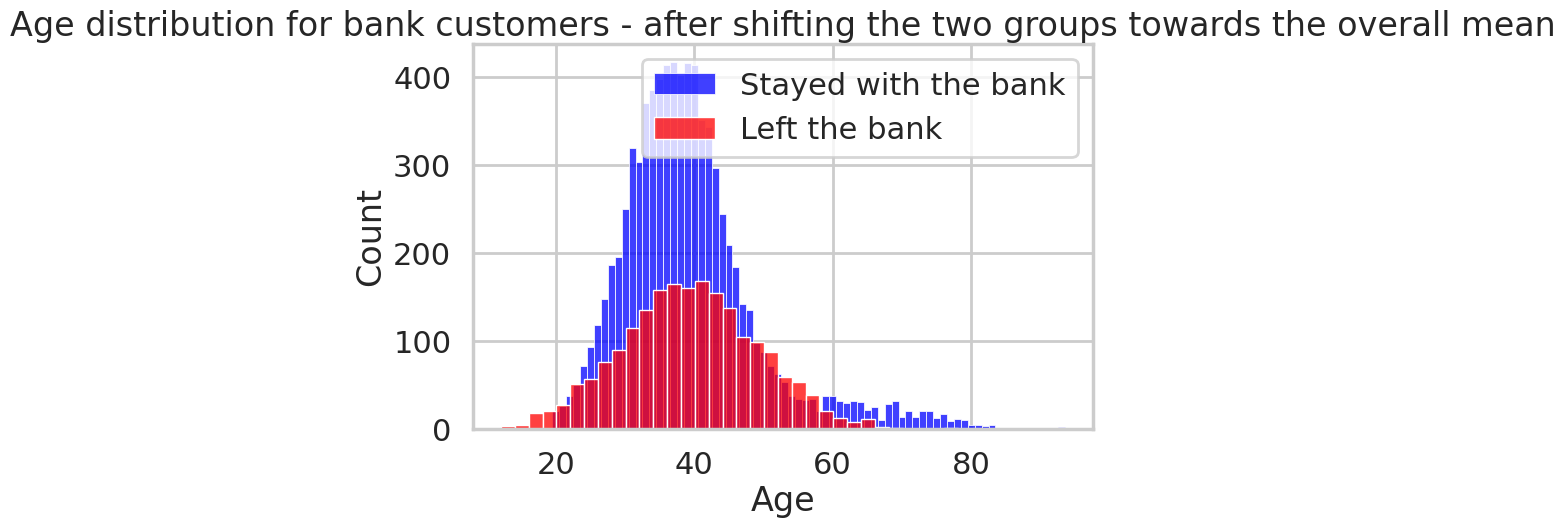

The difference in means between the 2 groups: 7.429608256300263


In [14]:
## TODO: Calculate the difference in means and shift the ages to the overall mean.

# Calculate the difference in means between df_0 and df_1, and shift the ages of the 2 groups towards the overall mean of the 'Age' of the entire dataset.

# shifting
overall_mean_age = df['Age'].mean()
print("Overall mean age:", overall_mean_age)

shifted_age_0 = df_0['Age'] - df_0['Age'].mean() + overall_mean_age
shifted_age_1 = df_1['Age'] - df_1['Age'].mean() + overall_mean_age

# ploting (after shifting)
sns.histplot(shifted_age_0, color='blue', label='Stayed with the bank')
sns.histplot(shifted_age_1, color='red', label='Left the bank')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution for bank customers - after shifting the two groups towards the overall mean')
plt.show()

# difference in means between df_0 and df_1
diff_means = df_1['Age'].mean() - df_0['Age'].mean()
print("The difference in means between the 2 groups:", diff_means)


In [15]:
## TODO: Perform bootstrap sampling to calculate the standard deviation for both groups and their difference.

# The following 2 TODO questions rely on material that we did not study.
# I will try to answer them based on what I read on the internet.
# We didn't speak about shifting the data, and we didn't study this technique for calculating the p_value.
# I don't know if this is correct and why this is working (or not).

# Bootstrap standard deviations for shifted groups
bs_shifted_std_0 = bs_choice(shifted_age_0, np.std, 500)
bs_shifted_std_1 = bs_choice(shifted_age_1, np.std, 500)

# take the average of all the standard deviations
print(f"Bootstrap standard deviation for stayed customers: {np.mean(bs_shifted_std_0)}")
print(f"Bootstrap standard deviation for left customers: {np.mean(bs_shifted_std_1)}")


# I will make both shifted groups the same size (because we need to sbutract them later)
if len(shifted_age_0) > len(shifted_age_1):
    shifted_age_0 = np.random.choice(shifted_age_0, size=len(shifted_age_1), replace=False)
elif len(shifted_age_1) > len(shifted_age_0):
    shifted_age_1 = np.random.choice(shifted_age_1, size=len(shifted_age_0), replace=False)

# Bootstrap standard deviations for the difference between the shifted groups
# so we subtract the two shifted groups and calculate the standard deviation
bs_diff = bs_choice(shifted_age_0 - shifted_age_1, np.std, 500)

# take the average of all the standard deviations
print(f"Bootstrap standard deviation for the difference: {np.mean(bs_diff)}")


Bootstrap standard deviation for stayed customers: 10.116132338324979
Bootstrap standard deviation for left customers: 9.739678910410145
Bootstrap standard deviation for the difference: 13.895232885321416


In [17]:
## TODO: Calculate the p-value by comparing the difference in means to the bootstrap distribution.

# I calculated p_value in two methods, but I got different results.
# I don't know why.

# method 1:
# calculate the p-value by comparing the difference in means to the bootstrap distribution
p_value_bs = np.sum(bs_diff >= diff_means) / len(bs_diff)
print("P-value using bootstrapping:", p_value_bs)


# method 2:
# Create the bootstrap distribution of the mean differences
bs_mean_diff = []

for _ in range(500):
    # Bootstrap samples for both groups
    sample_0 = np.random.choice(shifted_age_0, size=len(shifted_age_0), replace=True)
    sample_1 = np.random.choice(shifted_age_1, size=len(shifted_age_1), replace=True)

    # Calculate mean difference for this bootstrap iteration
    bs_mean_diff.append(np.mean(sample_0) - np.mean(sample_1))

# Convert to a NumPy array
bs_mean_diff = np.array(bs_mean_diff)

# Calculate p-value
p_value_bootstrap = np.mean(bs_mean_diff >= diff_means)
print(f"P-Value by bootstrap: {p_value_bootstrap}")


P-value using bootstrapping: 1.0
P-Value by bootstrap: 0.0


### Conclusion
Do we reject the Null Hypothesis ? Why ?

### I calculated p_value in two methods, but I got different results.
### I don't know why.

## Hypothesis 2: Credit Score

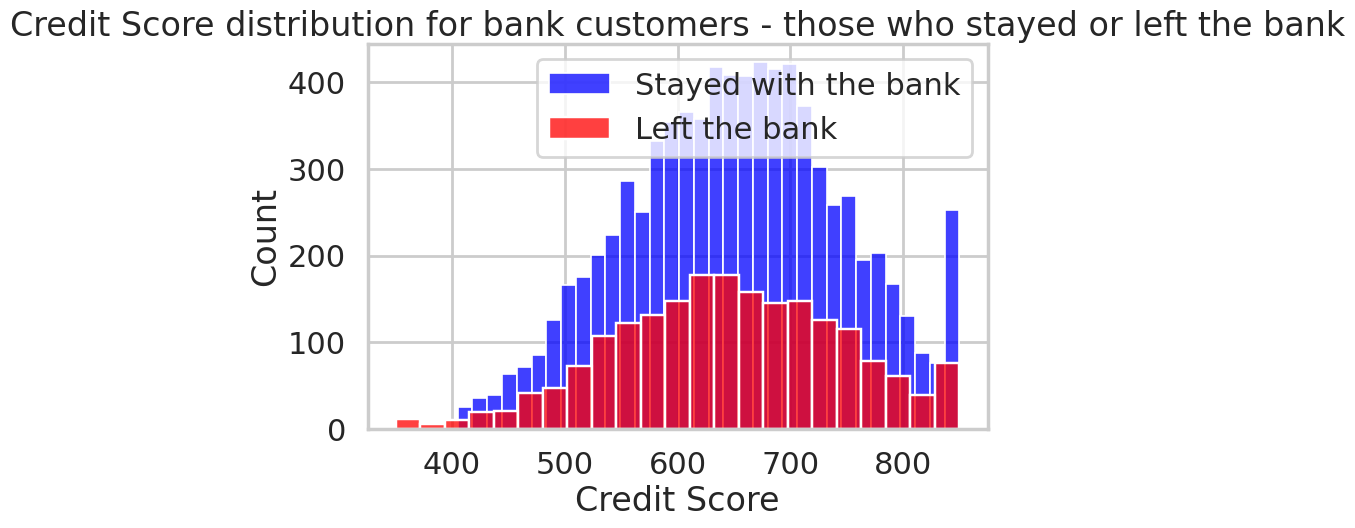

In [18]:
## TODO: Create histograms for the CreditScore distribution of both groups (Still with bank and Left the bank).

sns.histplot(df_0['CreditScore'], color='blue', label='Stayed with the bank')
sns.histplot(df_1['CreditScore'], color='red', label='Left the bank')
plt.legend()

plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.title('Credit Score distribution for bank customers - those who stayed or left the bank')
plt.show()


In [19]:
## TODO: Perform a t-test to compare the CreditScore between the two groups (Still with bank and Left the bank).

_ , p_value = scipy.stats.ttest_ind(df_0['CreditScore'], df_1['CreditScore'], equal_var=False)
print("P-value for Credit Score:", p_value)


P-value for Credit Score: 0.008464728991832862


### Conclusion
Do we reject the Null Hypothesis ? Why ?

#### We reject H0 because P-value is smaller than 0.05.
#### This means that the difference in credit score between the two groups is statistically significant.


## Hypothesis 3: Balance

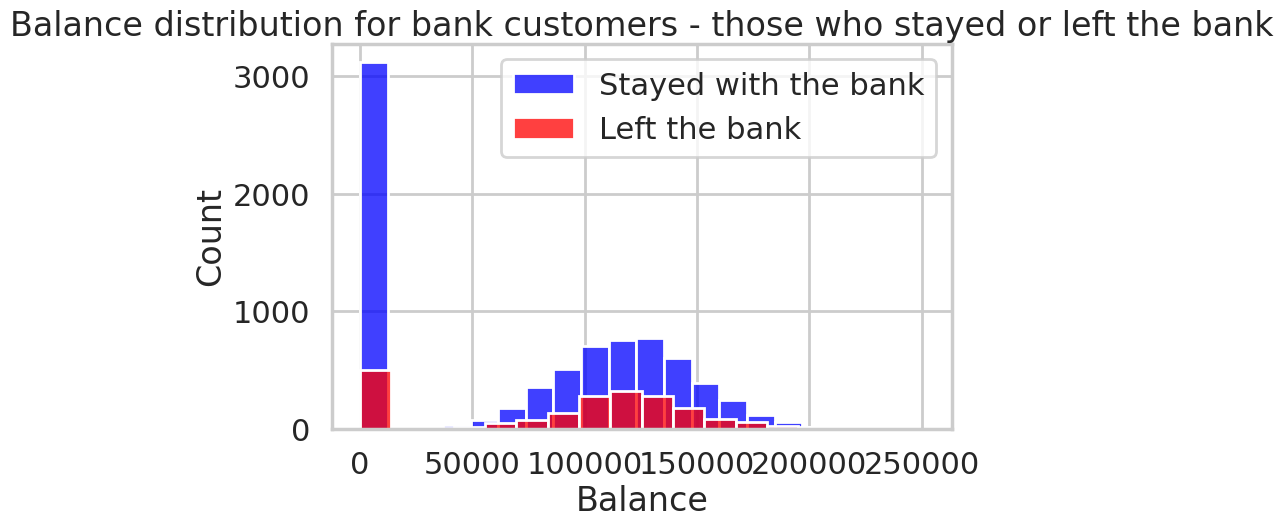

In [20]:
## TODO: Plot the distribution of Balance for both groups (Still with bank and Left the bank).

sns.histplot(df_0['Balance'], color='blue', label='Stayed with the bank')
sns.histplot(df_1['Balance'], color='red', label='Left the bank')
plt.legend()

plt.xlabel('Balance')
plt.ylabel('Count')
plt.title('Balance distribution for bank customers - those who stayed or left the bank')
plt.show()


In [21]:
## TODO: Perform a t-test to compare the Balance between customers who stayed with the bank and those who left.

_ , p_value = scipy.stats.ttest_ind(df_0['Balance'], df_1['Balance'], equal_var=False)
print("P-value for balance:", p_value)


P-value for balance: 6.318663518527974e-35


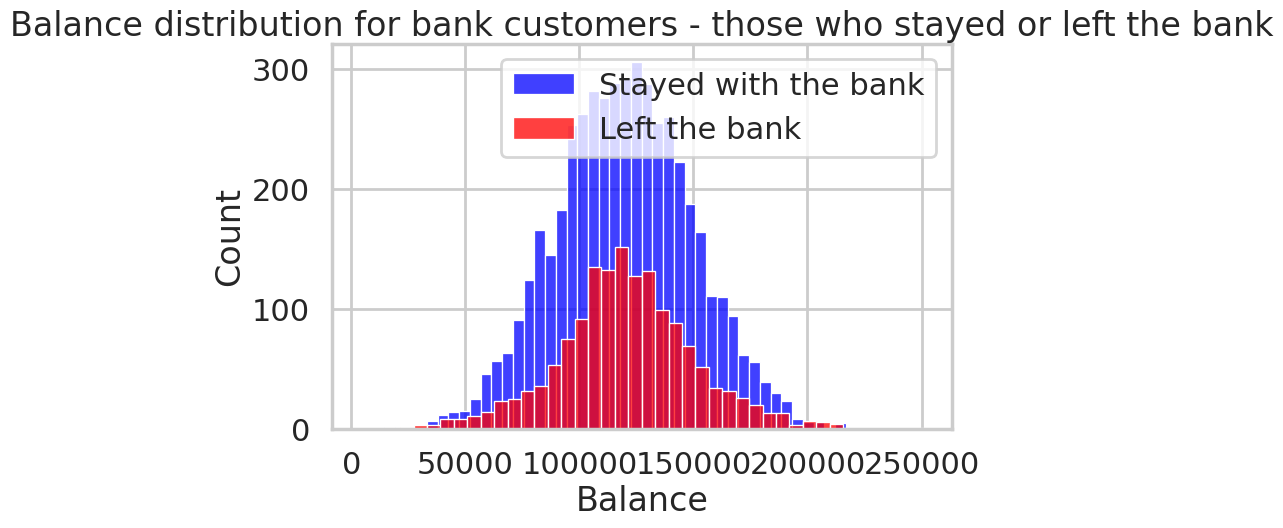

In [22]:
## TODO: Visualize the distribution of Balance for customers who stayed with the bank and those who left, excluding zero balances.

sns.histplot(df_0[df_0['Balance'] > 0]['Balance'], color='blue', label='Stayed with the bank')
sns.histplot(df_1[df_1['Balance'] > 0]['Balance'], color='red', label='Left the bank')
plt.legend()

plt.xlabel('Balance')
plt.ylabel('Count')
plt.title('Balance distribution for bank customers - those who stayed or left the bank')
plt.show()


In [23]:
## TODO: Perform a t-test to compare the Balance between customers who stayed with the bank and those who left, excluding zero balances.

_ , p_value = scipy.stats.ttest_ind(df_0[df_0['Balance'] > 0]['Balance'], df_1[df_1['Balance'] > 0]['Balance'], equal_var=False)
print("P-value for Balance:", p_value)  # the result is 0.17379960354870824


P-value for Balance: 0.17379960354870824


## Conclusion

Do we reject the Null Hypothesis ? Why ?

#### In the last example, we can't reject H0 because P-value is larger than 0.05.

## Hypothesis 4: Estimated Salary

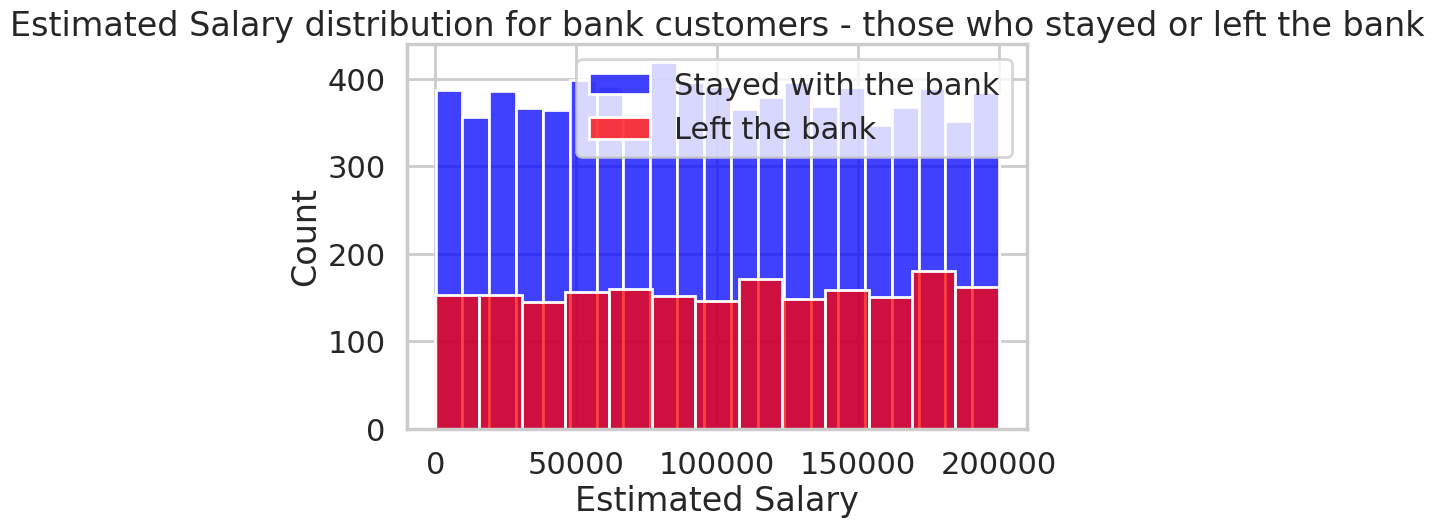

In [24]:
## TODO: Plot the distribution of EstimatedSalary for customers who stayed with the bank and those who left.

sns.histplot(df_0['EstimatedSalary'], color='blue', label='Stayed with the bank')
sns.histplot(df_1['EstimatedSalary'], color='red', label='Left the bank')
plt.legend()

plt.xlabel('Estimated Salary')
plt.ylabel('Count')
plt.title('Estimated Salary distribution for bank customers - those who stayed or left the bank')
plt.show()


In [25]:
## TODO: Perform a t-test to compare the EstimatedSalary between customers who stayed and those who left.

_ , p_value = scipy.stats.ttest_ind(df_0['EstimatedSalary'], df_1['EstimatedSalary'], equal_var=False)
print("P-value for Estimated Salary:", p_value)  # the result is 0.22892461305145798


P-value for Estimated Salary: 0.22892461305145795


### Using Bootstrapping

In [ ]:
# This question is just repeating itself from the previous question about bootstrapping.
# In this question we're supposed to do exacly the same thing as in the previous bootstrapping question, but on a different column.

# So I prefer not to copy my answer from the previous question.

# As I mentioned, we didn't study this technique about shifting the data and for calculating the p_value.
# So I don't know if my previous answer was correct or not.


In [ ]:
## TODO: Calculate the difference in means and shift the EstimatedSalary for both groups.

In [ ]:
## TODO: Calculate the bootstrap sample means for both groups and their difference.

In [ ]:
## TODO: Calculate the p-value based on the bootstrap distribution of the difference in means.

### Conclusion
Do we reject the Null Hypothesis ? Why ?

## Final Conclusion
What will be the most helpful feature in predicting churning?

#### The best features for predicting churning is the Age.
#### It has the smallest p-value.